# Density Map Guided Object Detection in Aerial Images

## 1 Import Modules

In [ ]:
import matplotlib.pyplot as plt # For plotting
import numpy as np              # NumPy, for working with arrays/tensors 
import time                     # For measuring time
import random                   # Python's random library
import os
from glob import glob
# PyTorch libraries:
import torch
import torchvision
import torchvision.transforms as transforms
import cv2
# install and import the torchinfo library
!pip install torchinfo
from torchinfo import summary
from IPython.display import clear_output

%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

## 2 Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
if torch.cuda.is_available():
  print("Cuda (GPU support) is available and enabled!")
  device = torch.device("cuda")
else:
  print("Cuda (GPU support) is not available :(")
  device = torch.device("cpu")

Cuda (GPU support) is available and enabled!


In [ ]:
! unzip '/content/drive/My Drive/VisDrone/VisDrone2019-DET-train.zip'
clear_output()

In [ ]:
! unzip '/content/drive/My Drive/CENG501/VisDrone2019-DET-val.zip'
clear_output()

In [ ]:
! unzip '/content/drive/My Drive/VisDrone/VisDrone2019-DET-test-challenge.zip'
clear_output()

In [ ]:
base_dir_train = '/content/VisDrone2019-DET-train'
base_dir_val  = '/content/VisDrone2019-DET-val'
base_dir_test = '/content/VisDrone2019-DET-test-challenge'

train_images = glob(base_dir_train + '/images/*.jpg')
val_images = glob(base_dir_val + '/images/*.jpg')
test_images = glob(base_dir_test + '/images/*.jpg')

In [ ]:
def load_VisDrone_Data(image_dir_list,base_dir):
  image_num = len(image_dir_list)
  x = []
  y = []
  for i in range(image_num):
    im_in = np.array(cv2.imread(image_dir_list[i]))
    x.append(im_in)
    if base_dir == '/content/VisDrone2019-DET-test-challenge':
      continue
    else: 
      anno_name = glob(base_dir +'/annotations' + image_dir_list[i][-28:-4] + '.txt')
      with open(anno_name[0]) as f:
        anno = f.read()
        y.append(anno.split())
  #X_data = np.concatenate(x)
  return x,y

In [ ]:
x_train,y_train = load_VisDrone_Data(train_images,base_dir_train)
x_val,y_val = load_VisDrone_Data(val_images,base_dir_val)
x_test,y_test = load_VisDrone_Data(test_images,base_dir_test)

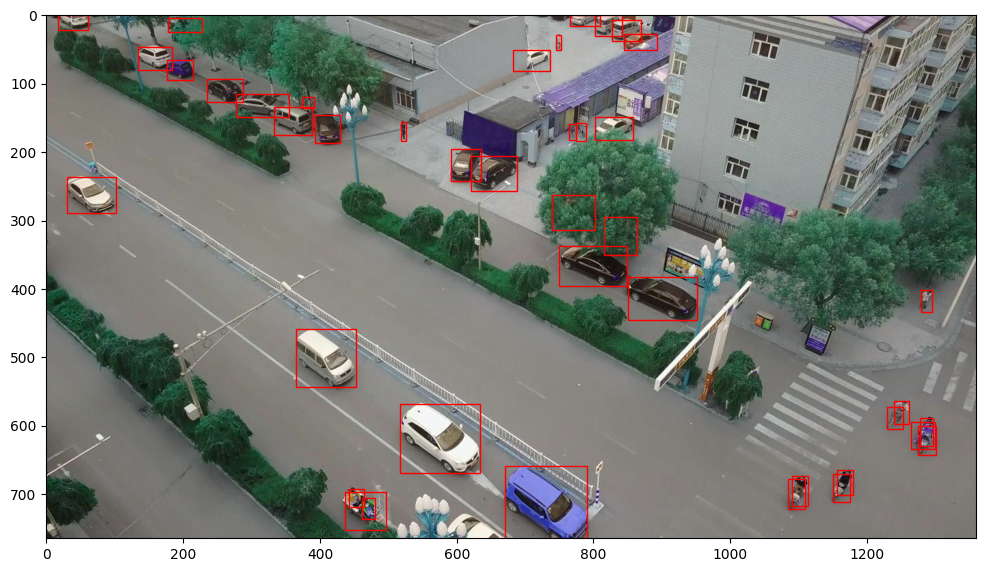

In [ ]:
import matplotlib.patches as patches

fig, ax = plt.subplots()

# Display the image
ax.imshow(x_train[1])

for i in range(len(y_train[1])):
  a = y_train[1][i].split(',')
  bboxes = patches.Rectangle((int(a[0]),int(a[1])), int(a[2]), int(a[3]), linewidth=1, edgecolor='r', facecolor='none')
  ax.add_patch(bboxes)

plt.show()